## In this notebook, we will count the amount of possible sets within a hand of 12 cards.

In [1]:
import random
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [2]:
#defining each of the four characteristics: colors, numbers, shades, and shapes
colors  =  ["red", "green", "purple"]
numbers =  [1,2,3]
shades  =  ["solid", "striped", "hollow"]
shapes  =  ["circle", "diamond", "square"]

In [3]:
#creating the deck of cards and giving each a unique identifier (ID)

total_cards = []

i=0

for co in colors:
    for nu in numbers:
        for sd in shades:
            for sp in shapes:
                
                total_cards.append( 
                    {"color": co, 
                     "number": nu,
                     "shade": sd,
                     "shape": sp,
                     "card_id": i} )
                i+=1

In [4]:
#counting the number of total cards that willl be in the deck
print(3 * 3 * 3 * 3)
len(total_cards)

81


81

In [5]:
#count the amount of sets present in a hand of 12 cards

def find_sets():
    
    s = random.sample(total_cards,12) #obtain a hand of 12 cards
    
    combinations = list(itertools.combinations(s, 3)) #obtain all possible combinations of 3 cards in that deck
    
    sets = []

    #for each combination, find out if it is a set or not 
    #a group of three cards will be a set if, for each individual characteristic (color, number, and shape), 
    #the three cards are all the exact same or all different 
    
    for c in combinations:

        colorlist = []
        numberlist = []
        shadelist = []
        shapelist = []

        for cc in c:

            colorlist.append(cc["color"])
            numberlist.append(cc["number"])
            shadelist.append(cc["shade"])
            shapelist.append(cc["shape"])

        if (len(np.unique(colorlist)) == 1) or (len(np.unique(colorlist)) == 3):
            if (len(np.unique(numberlist)) == 1) or (len(np.unique(numberlist)) == 3):
                if (len(np.unique(shadelist)) == 1) or (len(np.unique(shadelist)) == 3):
                    if (len(np.unique(shapelist)) == 1) or (len(np.unique(shapelist)) == 3):
                        sets.append(c)

    set_len = len(sets)
    
    return set_len

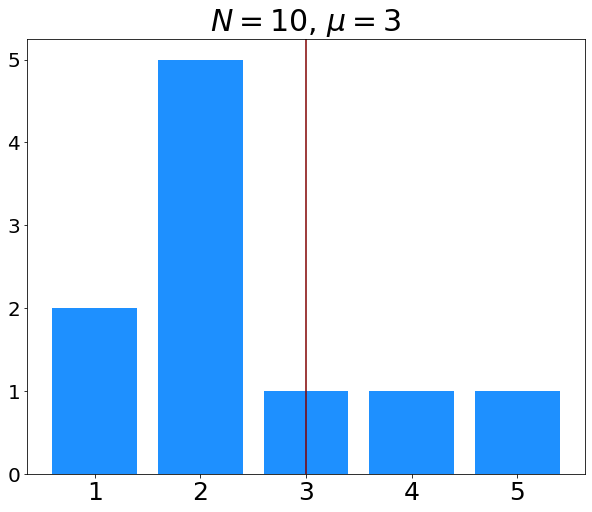

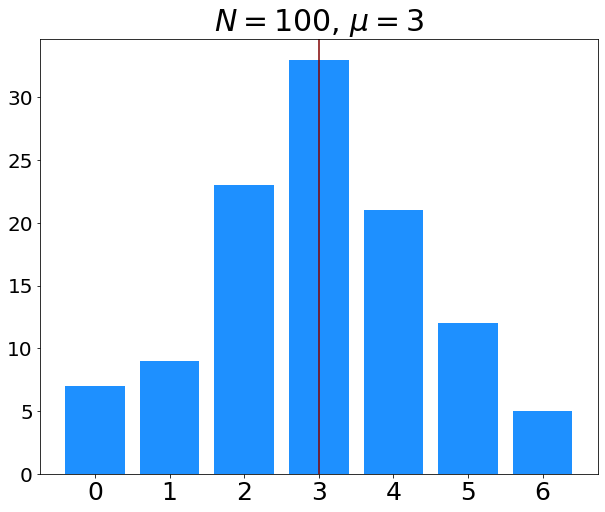

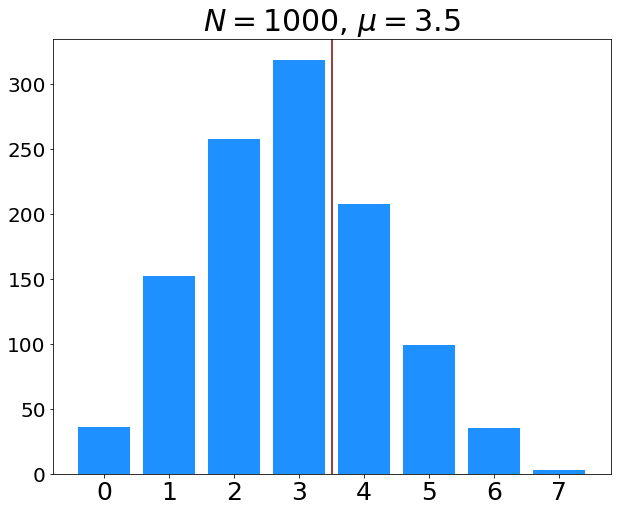

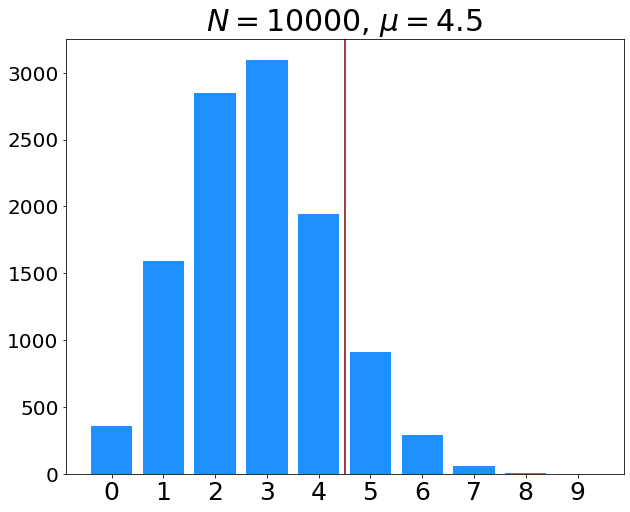

In [9]:
#draw a set of 12 cards N times and count all potential sets within

n = [10, 100, 1000, 10000]

set_nums = []

for N in n:
    
    for i in range(0,N):
        set_nums.append(find_sets())
        
    set_counts = Counter(set_nums)
    
    plt.figure(figsize=(10,8))
    plt.bar(set_counts.keys(), set_counts.values(), color ="dodgerblue")
    plt.axvline(statistics.mean(set_counts.keys()), color="maroon")
    plt.title("$N = $"+str(N)+", $\mu = $"+str(np.round(statistics.mean(set_counts.keys()),2)), size=30)
    plt.yticks(fontsize=20)
    plt.xticks(np.arange(min(set_counts.keys())-1,max(set_counts.keys()))+1,fontsize=25)
    plt.show()